# Convolutional Layers

### Implementing convolutional layers with keras

In [1]:

import sys

assert sys.version_info >= (3, 7)

In [2]:
import tensorflow as tf
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

In [3]:
if tf.config.list_physical_devices('GPU'):
  print("Connected to GPU successfully!")
else:
  print("No GPU connnected")

Connected to GPU successfully!


In [4]:
images=load_sample_images()["images"]
images=tf.keras.layers.CenterCrop(height=75,width=115)(images)
images=tf.keras.layers.Rescaling(scale=1/255)(images)

In [5]:
images.shape

TensorShape([2, 75, 115, 3])

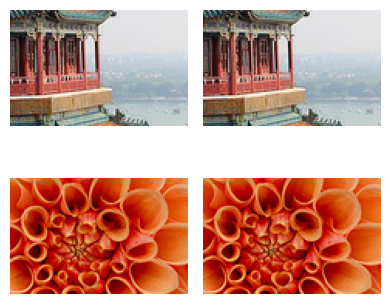

In [6]:
plt.figure(figsize=(4,4))
for img_idx in (0,1):
    for j in (0,1):
        plt.subplot(2,2,img_idx*2+j+1)
        plt.imshow(images[img_idx,:,:,:])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
tf.keras.utils.set_random_seed(42)

conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=8)
fmap=conv_layer(images)

In [8]:
fmap.shape

TensorShape([2, 68, 108, 32])

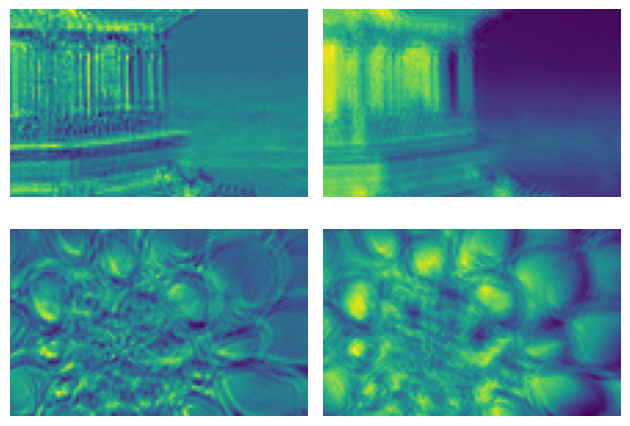

In [9]:
for img_idx in (0,1):
    for fmap_idx in (0,1):
        plt.subplot(2,2,img_idx*2+fmap_idx+1)
        plt.imshow(fmap[img_idx,:,:,fmap_idx])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7,padding="same")
fmap=conv_layer(images)

In [11]:
fmap.shape

TensorShape([2, 75, 115, 32])

In [12]:
conv_layer=tf.keras.layers.Conv2D(filters=32,kernel_size=7,padding="same",
                                 strides=2)
fmap=conv_layer(images)
fmap.shape

TensorShape([2, 38, 58, 32])